In [1]:
import pandas as p

In [2]:
station_day = p.read_csv("station_day(cleaned).csv")

In [3]:
#PM2.5 and PM10 were taken after finding correlation with aqi value
features = ['PM2.5','PM10','Month','Season','City','Weekday_or_weekend','Regular_day_or_holiday']

In [4]:
station_day["Month"] = station_day["Month"].astype('category')

In [5]:
station_day["Month"] = station_day["Month"].cat.codes

In [6]:
station_day["City"] = station_day["City"].astype('category')

In [7]:
station_day["City"] = station_day["City"].cat.codes

In [8]:
station_day["Weekday_or_weekend"] = station_day["Weekday_or_weekend"].astype('category')

In [9]:
station_day["Weekday_or_weekend"] = station_day["Weekday_or_weekend"].cat.codes

In [10]:
station_day["Regular_day_or_holiday"] = station_day["Regular_day_or_holiday"].astype('category')
station_day["Regular_day_or_holiday"] = station_day["Regular_day_or_holiday"].cat.codes

In [11]:
station_day["Season"] = station_day["Season"].astype('category')
station_day["Season"] = station_day["Season"].cat.codes

In [12]:
x = station_day.loc[:,features].values

In [13]:
def func(index):
    if index>=0 and index<=50:
        return 0
    if index>=51 and index<=100:
        return 1
    if index>=101 and index<=200:
        return 2
    if index>=201 and index<=300:
        return 3
    if index>=301 and index<=400:
        return 4
    if index>=401 and index<=501:
        return 5
    if index>=501:
        return 6


In [14]:
station_day["AQI"] = station_day["AQI"].map(func)

In [15]:
y = station_day.loc[:,"AQI"].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
from sklearn.tree import DecisionTreeClassifier


In [20]:
x = scaler.fit_transform(x)

In [21]:
#create training and testing dataset.Random state parameter ensures training and test data doesnt change on rerun
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
classifier = DecisionTreeClassifier()

In [23]:
classifier = classifier.fit(x_train,y_train)

In [24]:
pred = classifier.predict(x_test)

In [25]:
from sklearn.metrics import plot_confusion_matrix

In [26]:
import matplotlib.pyplot as plot 

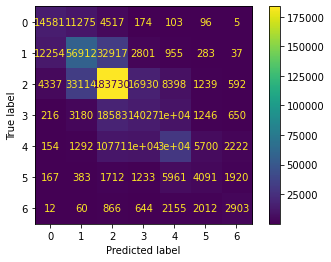

In [27]:
plot_confusion_matrix(classifier,x_test,y_test)